In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df=pd.read_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week3/Project Week 3/Data/Parking_Violations_Issued.csv")


C:\Users\igara\AppData\Local\Temp\ipykernel_16224\2757283998.py:1: DtypeWarning: Columns (18,23,29,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week3/Project Week 3/Data/Parking_Violations_Issued.csv")


In [105]:
df.duplicated().sum() #no hay rows duplicadas

0

In [113]:
df.isna().sum()

Summons Number                             0
Plate ID                                3612
Registration State                         0
Plate Type                                 0
Issue Date                                 0
Violation Code                             0
Vehicle Body Type                     111377
Vehicle Make                           63273
Issuing Agency                             0
Street Code1                               0
Street Code2                               0
Street Code3                               0
Vehicle Expiration Date                    0
Violation Location                    671170
Violation Precinct                         0
Issuer Precinct                            0
Issuer Code                                0
Issuer Command                        654437
Issuer Squad                          654437
Violation Time                          2074
Time First Observed                  8080298
Violation County                      705205
Violation 

In [114]:
columns_drop=df.columns[df.isna().sum()>1000000]

In [115]:
columns_drop

Index(['Time First Observed', 'Intersecting Street', 'Violation Legal Code',
       'Days Parking In Effect    ', 'From Hours In Effect',
       'To Hours In Effect', 'Unregistered Vehicle?', 'Meter Number',
       'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [116]:
df_clean=df.drop(columns=columns_drop)

In [117]:
df_clean.isna().sum()

Summons Number                            0
Plate ID                               3612
Registration State                        0
Plate Type                                0
Issue Date                                0
Violation Code                            0
Vehicle Body Type                    111377
Vehicle Make                          63273
Issuing Agency                            0
Street Code1                              0
Street Code2                              0
Street Code3                              0
Vehicle Expiration Date                   0
Violation Location                   671170
Violation Precinct                        0
Issuer Precinct                           0
Issuer Code                               0
Issuer Command                       654437
Issuer Squad                         654437
Violation Time                         2074
Violation County                     705205
Violation In Front Of Or Opposite    769191
Number                          

In [121]:
df_clean=df_clean.drop(columns=["Feet From Curb","Violation Time","Sub Division","Date First Observed","Street Code2","Street Code3",
                                "Vehicle Year","Violation Location","Number","Violation County","Issuer Command","Issuer Squad", "Issuer Code","Issuer Precinct",
                                "Violation Precinct","Vehicle Expiration Date"])

In [123]:
top_vehicles=df_clean["Vehicle Make"].value_counts()

In [125]:
top_vehicles=top_vehicles.sort_values(ascending=False)

In [127]:
top_vehicles=top_vehicles.head(15)
top_vehicles

Vehicle Make
FORD     1248622
TOYOT     878786
HONDA     810460
CHEVR     743556
NISSA     655273
DODGE     316499
GMC       313671
ME/BE     299845
FRUEH     289634
INTER     277444
BMW       270968
JEEP      213572
HYUND     190631
LEXUS     181642
ACURA     161959
Name: count, dtype: int64

In [129]:
top_vehicles=pd.DataFrame(top_vehicles)

C:\Users\igara\AppData\Local\Temp\ipykernel_16224\1672431966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


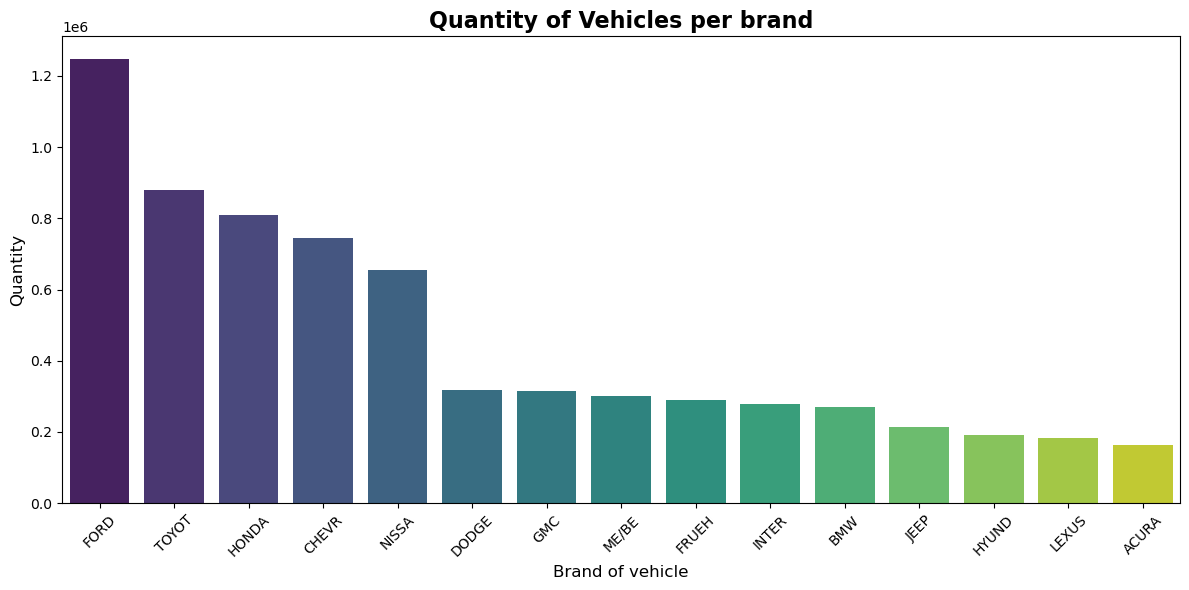

In [131]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_vehicles,
    x="Vehicle Make",
    y="count",
    palette="viridis",  
    errorbar=None
)

plt.title("Quantity of Vehicles per brand", fontsize=16, fontweight="bold")
plt.xlabel("Brand of vehicle", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(fontsize=10)


plt.tight_layout()  # Ajustar el layout para evitar recortes
plt.show()

In [133]:
df_clean["Issue Date"]=pd.to_datetime(df_clean["Issue Date"])

In [134]:
df_clean["Issue Date"].describe().T

count                          9100275
mean     2014-01-09 00:10:36.948134400
min                1970-12-18 00:00:00
25%                2013-10-15 00:00:00
50%                2014-01-09 00:00:00
75%                2014-04-05 00:00:00
max                2069-12-23 00:00:00
Name: Issue Date, dtype: object

In [135]:
df_clean_Date=df_clean.copy()
df_clean_Date["Issue Date Updated"]=df_clean["Issue Date"].dt.to_period("M")
df_clean_Date["Year"]=df_clean_Date["Issue Date"].dt.year.astype(int)

C:\Users\igara\AppData\Local\Temp\ipykernel_16224\2587328962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_clean_Date["Year"], palette="coolwarm")


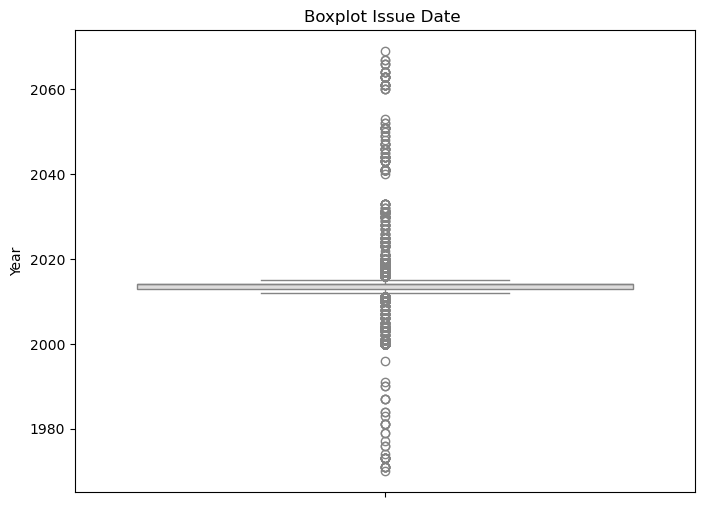

In [138]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_clean_Date["Year"], palette="coolwarm")
plt.title("Boxplot Issue Date ")
plt.ylabel("Year")
plt.show()

In [139]:
Q1 = df_clean["Issue Date"].quantile(0.25)
Q3 = df_clean["Issue Date"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
df_filter = df_clean[(df_clean["Issue Date"] >= lower_bound) & (df_clean["Issue Date"] <= upper_bound)]


In [179]:
print(top_vehicles_make.head(20).sum())
top_vehicles_make_list=top_vehicles.index

0.8379137558394172


In [181]:
top_vehicles_body=df_filter["Vehicle Body Type"].value_counts(normalize=True)
top_vehicles_body=top_vehicles_body.sort_values(ascending=False)
top_vehicles_body=top_vehicles_body.head(20)
top_vehicles_body_list=top_vehicles_body.index
print(top_vehicles_body.head(20).sum())

0.9853080921159267


In [151]:
df_filter_2 = df_filter[(df_filter["Vehicle Make"].isin(top_vehicles_make_list)) & (df_filter["Vehicle Body Type"].isin(top_vehicles_body_list))]

In [169]:
df_filter_2.sample(500).to_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week3/Project Week 3/Data/Parking_Violations_Issued_Filtered.csv", index=False)

In [153]:
df_filter_2.shape

(6694917, 14)

In [187]:
df_filter.to_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week3/Project Week 3/Data/Parking_Violations_Issued_Filtered_calculations.csv", index=False)